In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
import warnings
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
class_names = sorted(Base.classes.keys())
print(class_names)


['measurement', 'station']


In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
formatted_date = (most_recent_date,)
print(formatted_date)


('2017-08-23',)


Text(0, 0.5, 'Inches')


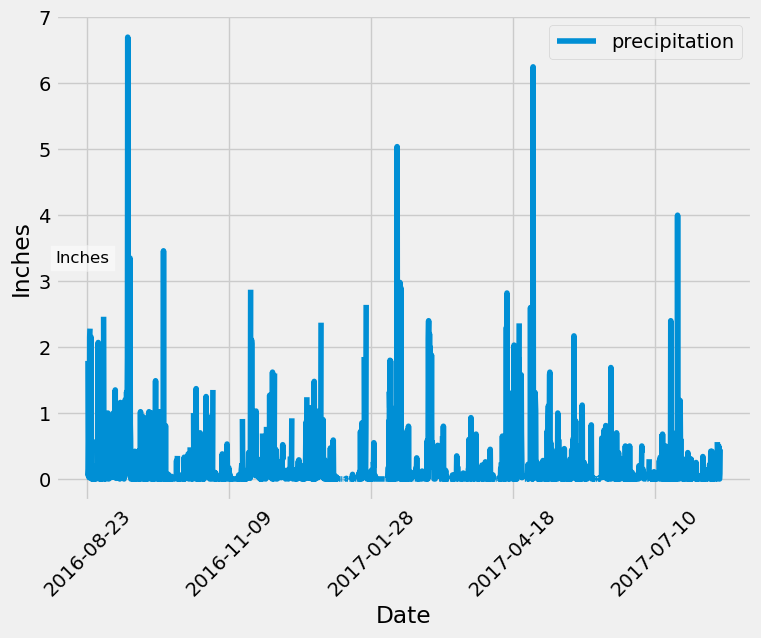

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
specific_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= specific_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'precipitation'])
df.set_index('Date', inplace=True)

# Sort the dataframe by date
df = df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(8, 6))
df.plot(ax=ax, rot=45, xlabel='Date', ylabel='Inches')

# Add custom text to the plot
text = ax.text(0, 0.5, 'Inches', transform=ax.transAxes, fontsize=12, verticalalignment='center', horizontalalignment='left', color='black', bbox=dict(facecolor='white', alpha=0.5))

# Output the text 
print(text)

plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(Station.station)).scalar()
print(f"Total number of stations: {num_stations}")


Total number of stations: 9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print("[{}]".format(',\n '.join("('{}', {})".format(station, count) for station, count in active_stations)))


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'
temp_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station).all()
print(f"{temp_stats}")


[(54.0, 85.0, 71.66378066378067)]


Text(0.5, 4.183333333333314, 'Temperature')


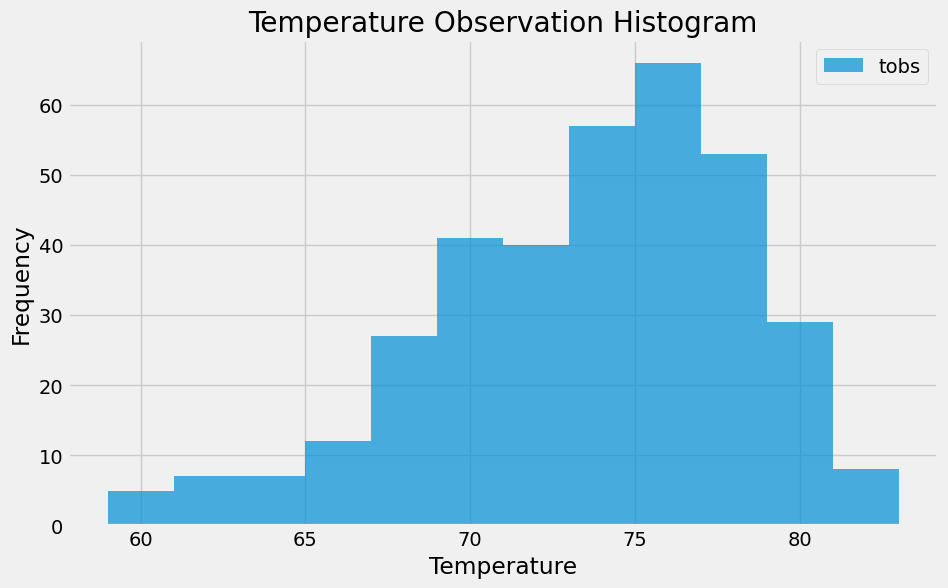

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_results = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= specific_date).all()
tobs_df = pd.DataFrame(tobs_results, columns=['tobs'])

# Add custom text to the plot
text = ax.text(0.5, 4.183333333333314, 'Temperature', transform=ax.transAxes, fontsize=12, verticalalignment='center', horizontalalignment='center')

# Output the text that was added to the plot
print(text)

# Plot the results as a histogram
fig, ax = plt.subplots(figsize=(10, 6))
tobs_df.plot.hist(bins=12, ax=ax, title='Temperature Observation Histogram', alpha=0.7)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()